In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [83]:
df = pd.read_csv('Train.csv')

df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [84]:
df.shape

(8068, 11)

In [85]:
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [86]:
df.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [87]:
# filling categorical columns

missing_cat_cols = ['Ever_Married' , 'Graduated' , 'Profession' , 'Var_1']

for col in missing_cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [88]:
df[missing_cat_cols].isna().sum()

Ever_Married    0
Graduated       0
Profession      0
Var_1           0
dtype: int64

In [89]:
# filling numerical columns

missing_num_cols = ['Work_Experience' , 'Family_Size']

for col in missing_num_cols:
    df[col] = df[col].fillna(df[col].mean())

In [90]:
df[missing_num_cols].isna().sum()

Work_Experience    0
Family_Size        0
dtype: int64

In [91]:
# Remove Irrelevant Features
df = df.drop('ID' , axis = 1)

In [92]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A


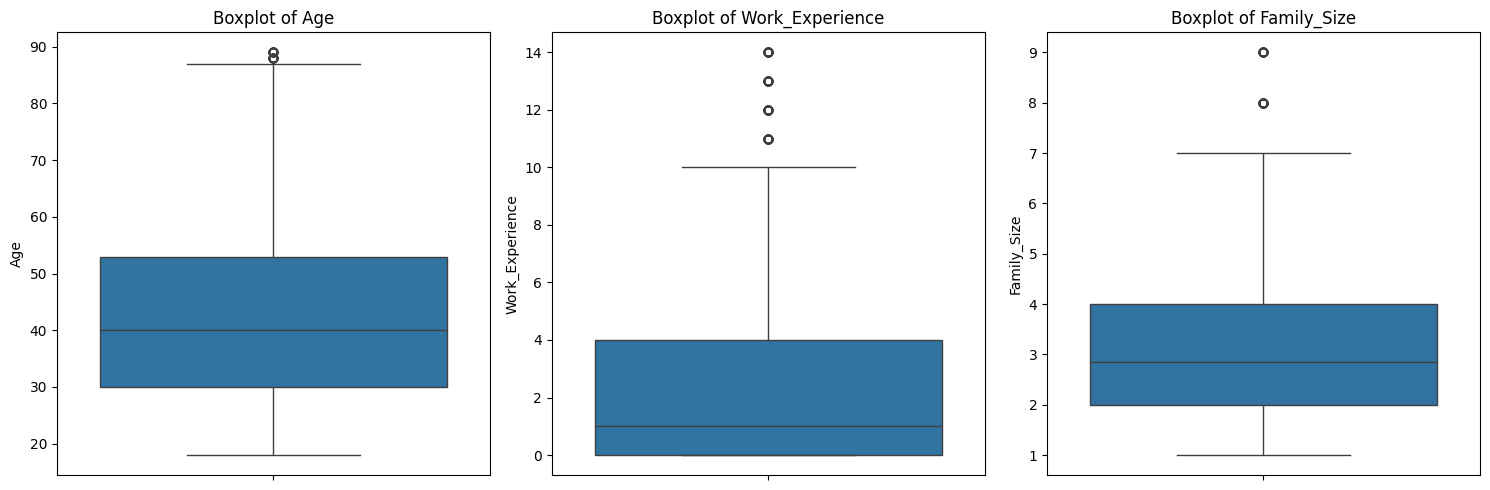

In [93]:
numerical_cols = ['Age', 'Work_Experience', 'Family_Size']
plt.figure(figsize=(15, 5))

for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [94]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Removing outliers
df_cleaned = remove_outliers(df, numerical_cols)

In [95]:
df_cleaned.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A


In [96]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# Assuming df is your preprocessed DataFrame
# Binary encoding
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Ever_Married'] = df['Ever_Married'].map({'Yes': 1, 'No': 0})
df['Graduated'] = df['Graduated'].map({'Yes': 1, 'No': 0})

# Ordinal encoding for Spending_Score
spending_order = ['Low', 'Average', 'High']
df['Spending_Score'] = OrdinalEncoder(categories=[spending_order]).fit_transform(df[['Spending_Score']])

# One-hot encoding for Profession and Var_1
df = pd.get_dummies(df, columns=['Profession', 'Var_1'], drop_first=True)

In [97]:
df.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Doctor,Profession_Engineer,...,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,0,22,0,1.000000,0.0,4.0,D,False,False,...,True,False,False,False,False,False,True,False,False,False
1,0,1,38,1,2.641663,1.0,3.0,A,False,True,...,False,False,False,False,False,False,True,False,False,False
2,0,1,67,1,1.000000,0.0,1.0,B,False,True,...,False,False,False,False,False,False,False,False,True,False
3,1,1,67,1,0.000000,2.0,2.0,B,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0,1,40,1,2.641663,2.0,6.0,A,False,False,...,False,False,False,False,False,False,False,False,True,False


In [100]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

In [101]:
df.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Doctor,Profession_Engineer,...,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,0,0.056338,0,1.000000,0.0,4.0,D,False,False,...,True,False,False,False,False,False,True,False,False,False
1,0,1,0.281690,1,2.641663,1.0,3.0,A,False,True,...,False,False,False,False,False,False,True,False,False,False
2,0,1,0.690141,1,1.000000,0.0,1.0,B,False,True,...,False,False,False,False,False,False,False,False,True,False
3,1,1,0.690141,1,0.000000,2.0,2.0,B,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0,1,0.309859,1,2.641663,2.0,6.0,A,False,False,...,False,False,False,False,False,False,False,False,True,False
